In [2]:
from brian2 import *
%matplotlib inline
import numpy as np
from numpy import heaviside
from math import *
import pandas as pd
from numba import jit

@jit
# Potential function
def U(phi,I=1.01,gamma=1,T=4.615120516841259, tau=1):
    value = (I/gamma)*(1-np.exp(-gamma*T*phi/tau))
    return value
@jit
# Function to convert potential to 'phase' corresponding to Mirollo-Strogatz model
def U_inv(y,I=1.01,gamma=1,T=4.615120516841259,tau=1):
    value = (tau/(gamma*T))*np.log((1-(gamma*y/I))**(-1))
    return value
## Loading Inhibitory and Excitatory Edge topology from a 81 × 81 Matrix specifying 20 connections for each neuron 
# Import Sudoku matrices: (rows: pre-synaptic, columns: post-synaptic)

inhib_connect = np.loadtxt('Clueless_Sudoku_inhib.txt', dtype=int)
excit_connect = np.loadtxt('Clueless_Sudoku_excit.txt', dtype=int)

# Get tuples of corresponding connection indices for putting in Brian2's synapse connect() function
inhib_pre, inhib_post = inhib_connect.nonzero()
excit_pre, excit_post = excit_connect.nonzero()

In [3]:
start_scope()
N = 81                          # No. of neurons
tau = 10*ms                     # Time constant of neuron
A_osc = 0.2                     # Oscillation amplitude #?
freq = 25*Hz                    # Frequency of common oscillatory drive #?
transm_delay = pow(10,-5)*ms    # Delay between firing and reception of pulse by post-synaptic neuron

defaultclock.dt=0.1*ms

# Pulse strengths: inhibitory and excitatory
C_inh = -2.7*pow(10,-1)
C_exc = +2.8*pow(10,-6)

eqs = '''
dv/dt = (I-v)/tau : 1
phase = (freq*t) % 1.0 : 1
I = 30 : 1
'''
# Create a neuron group 'G' following the above equation
G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='euler')
G.v = 'rand()' 


# Inhibitory synapses
S_inhib = Synapses(G,G, on_pre='v_post += C_inh', delay=transm_delay)
S_inhib.connect(i=inhib_pre, j=inhib_post)

# Excitatory synapses
S_excit = Synapses(G,G, on_pre='v_post += C_exc', delay=transm_delay)
S_excit.connect(i=excit_pre, j=excit_post)

# Record of potential for all neurons
potential = StateMonitor(G, 'v', record=True)
# Record of oscillatory drive (common to all neurons)
osc = StateMonitor(G, "I", record=0)
# Record of all spikes
firing_time = SpikeMonitor(G, 'phase')
t=25000
run(t*ms)
I = (str(list(G.I.__dict__.values())[1]))[86:88]


WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


In [7]:
runnum=1

In [8]:
import os
script_dir = os.path.dirname('DC Only.ipynb')
results_dir = os.path.join(script_dir, 'DCInput_Results/')

if not os.path.isdir(results_dir):
    os.makedirs(results_dir)

plt.savefig(results_dir +str(runnum)+'intial')

<Figure size 432x288 with 0 Axes>

In [5]:
SMALL_SIZE = 10
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

csfont = {'fontname':'sans-serif'}
hfont = {'fontname':'serif'}
rcParams.update({'font.family':'serif'})
rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)

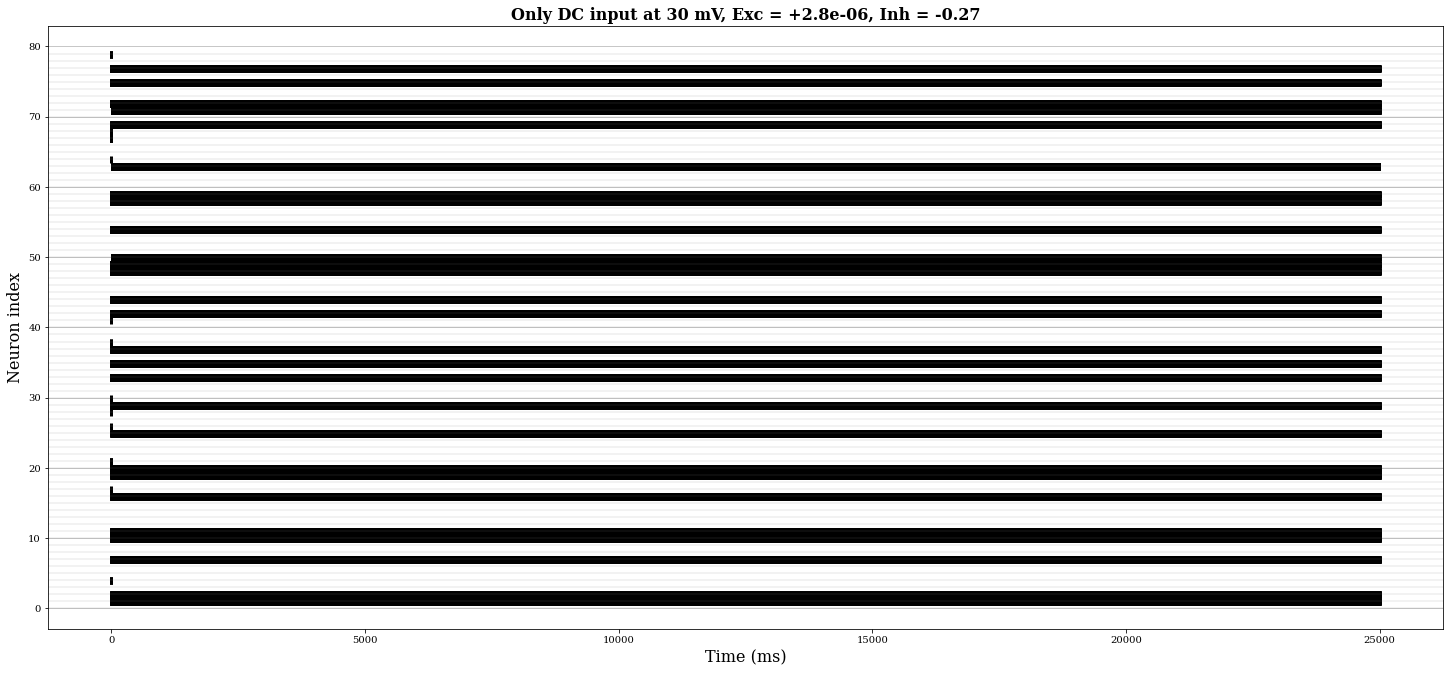

In [19]:
fig = figure(figsize=(25,15))
#x_lim = (3950,3990)

gs = fig.add_gridspec(4,1)
ax=fig.add_subplot(gs[1:,:])
ax.plot(firing_time.t/ms, firing_time.i,'|k', markerfacecolor='xkcd:salmon', mew=3,markersize=7)
#ax.set_xlim(x_lim)
ax.grid(True, 'both','y',linewidth=0.7)
for i in range(80):
    ax.axhline(y=i, linewidth=0.2, color='gray')
csfont = {'fontname':'sans-serif'}
hfont = {'fontname':'serif'}
plt.rc('xtick', labelsize=10)
xlabel('Time (ms)',**hfont,fontsize=16)
ylabel('Neuron index',**hfont,fontsize=16)
title('Only DC input at '+str(I) +', '+'Exc = +'+str(C_exc) + ', '+ 'Inh = ' + str(C_inh), fontsize=16,**hfont,fontweight="bold")
plt.savefig(results_dir +str(runnum)+ 'Full Raster plot.png')
show()


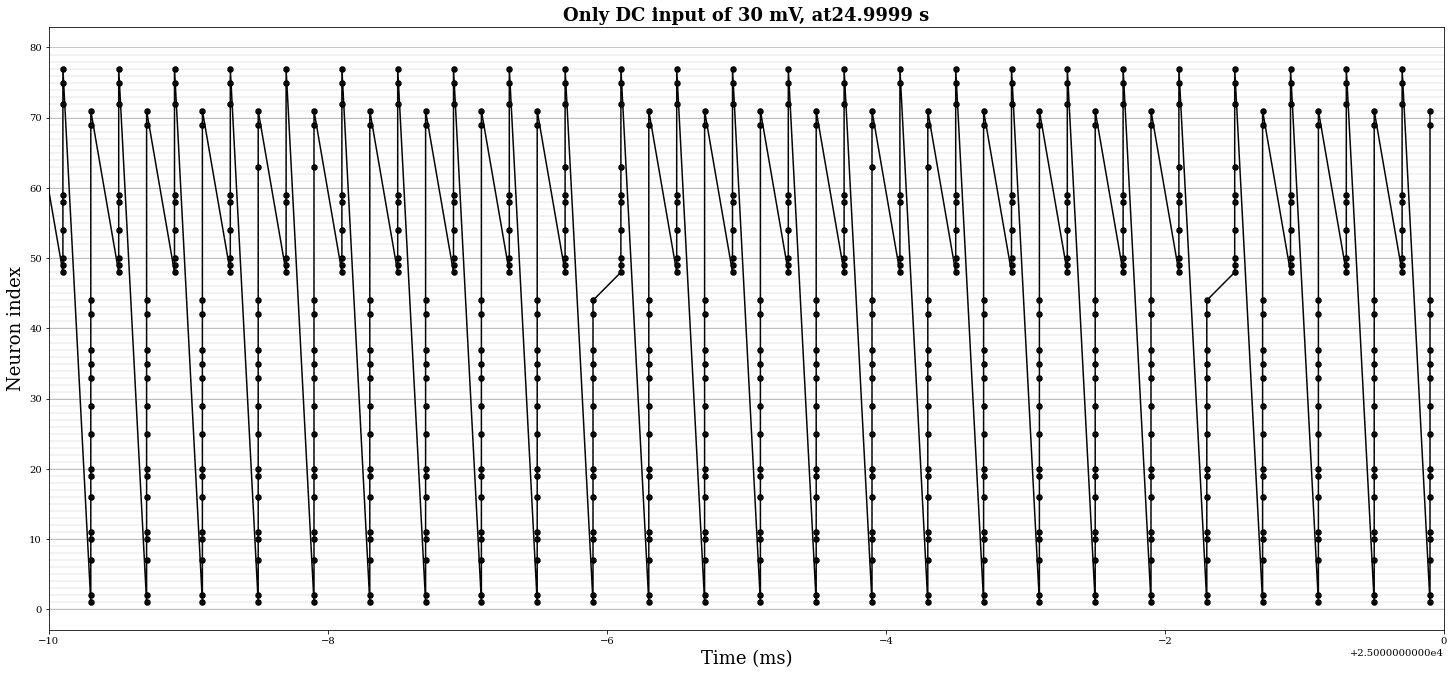

In [30]:
fig = figure(figsize=(25,15))
x_lim = (24990,25000)

gs = fig.add_gridspec(4,1)
ax=fig.add_subplot(gs[1:,:])
ax.plot(firing_time.t/ms, firing_time.i,'.-k', markerfacecolor='xkcd:salmon', mew=3,markersize=7)
ax.set_xlim(x_lim)
ax.grid(True, 'both','y',linewidth=0.7)
for i in range(80):
    ax.axhline(y=i, linewidth=0.2, color='gray')
csfont = {'fontname':'sans-serif'}
hfont = {'fontname':'serif'}
plt.rc('xtick', labelsize=10)


xlabel('Time (ms)',**hfont,fontsize=18)
ylabel('Neuron index',**hfont,fontsize=18)
title('Only DC input of '+str(I) +', '+'at'+str(potential.t[-1]),fontsize=18,**hfont,fontweight="bold")
plt.savefig(results_dir +str(runnum)+ 'End_Directed_Raster_plot.png')
show()

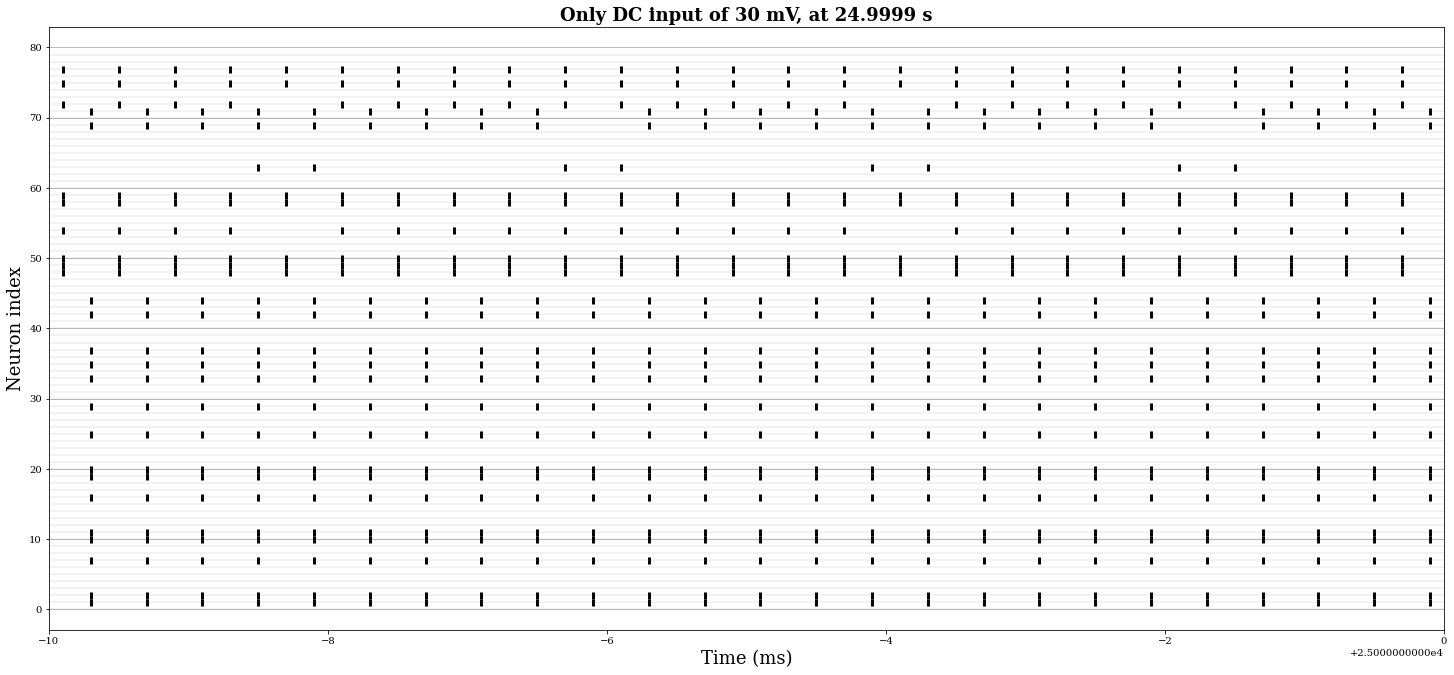

In [31]:
fig = figure(figsize=(25,15))
x_lim = (24990,25000)

gs = fig.add_gridspec(4,1)
ax=fig.add_subplot(gs[1:,:])
ax.plot(firing_time.t/ms, firing_time.i,'|k', markerfacecolor='xkcd:salmon', mew=3,markersize=7)
ax.set_xlim(x_lim)
ax.grid(True, 'both','y',linewidth=0.8,zorder=0)
for i in range(80):
    ax.axhline(y=i, linewidth=0.2, color='gray')
csfont = {'fontname':'sans-serif'}
hfont = {'fontname':'serif'}
plt.rc('xtick', labelsize=10)
xlabel('Time (ms)',**hfont,fontsize=18)
ylabel('Neuron index',**hfont,fontsize=18)
title('Only DC input of '+str(I) +', at '+str(potential.t[-1]),fontsize=18,**hfont,fontweight="bold")
plt.savefig(results_dir +str(runnum)+ 'Final_Raster_plot.png')
#grid('on',linestyle = '--', linewidth = 2,zorder=0)
show()


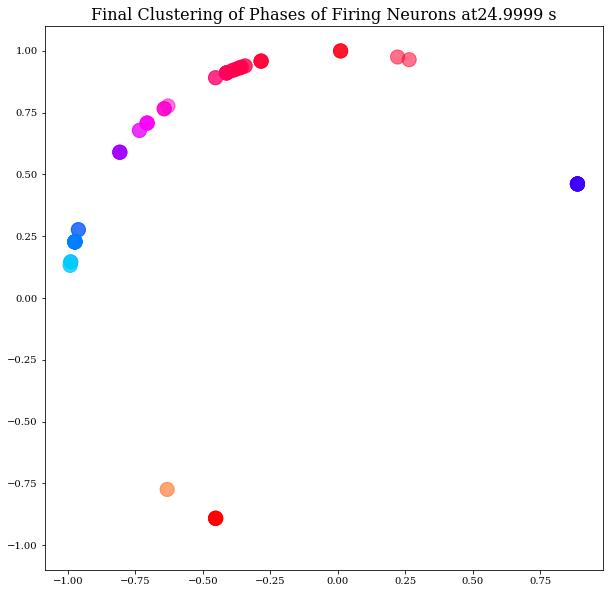

23


In [12]:
pot_arr = potential.v.copy()
pot_arr[pot_arr>1] = 1
phase = U_inv(pot_arr)
index2 = -1
sorted_phase = np.sort(phase[:,index2])

index3 = -1

sin_phase = np.sin(2*pi*phase[:,index3])
cos_phase = np.cos(2*pi*phase[:,index3])
colors=sin_phase
figure(figsize=(10,10))
scatter(cos_phase,sin_phase,c=colors, s=200, cmap='hsv', alpha=0.55)

# xlim((-1.1,1.1))
ylim((-1.1,1.1))
plt.title('Final Clustering of Phases of Firing Neurons at ' + str(potential.t[index3]), fontsize=16)
plt.savefig(results_dir +str(runnum)+ 'Final Clustering.png')
show()
print(len(np.unique(sin_phase)))


[-0.2545601  -0.23708114 -0.23240419 -0.2236667  -0.19121412 -0.18870419
 -0.18338235 -0.1713713  -0.17031397 -0.16236082 -0.15979259 -0.1595367
 -0.15911232 -0.15866077 -0.15308553 -0.14702679 -0.13991024 -0.13893219
 -0.13375214 -0.13011025 -0.12771926 -0.12209607 -0.12188069 -0.11997125
 -0.11799524 -0.11215293 -0.11190926 -0.11072015 -0.11001467 -0.10302122
 -0.09691946 -0.08696726 -0.08554279 -0.08236914 -0.07883664 -0.07879326
 -0.0751689  -0.06760587 -0.04360226 -0.04090693 -0.03049761 -0.02980262
 -0.02617225 -0.01089709 -0.00741295  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.00153559  0.01504217
  0.01550568  0.01567658  0.01595311  0.01602745  0.02016657  0.02198406
  0.0366966   0.03701285  0.04369965  0.0594142   0.06689163  0.06926088
  0.07273065  0.08508306  0.11962313]


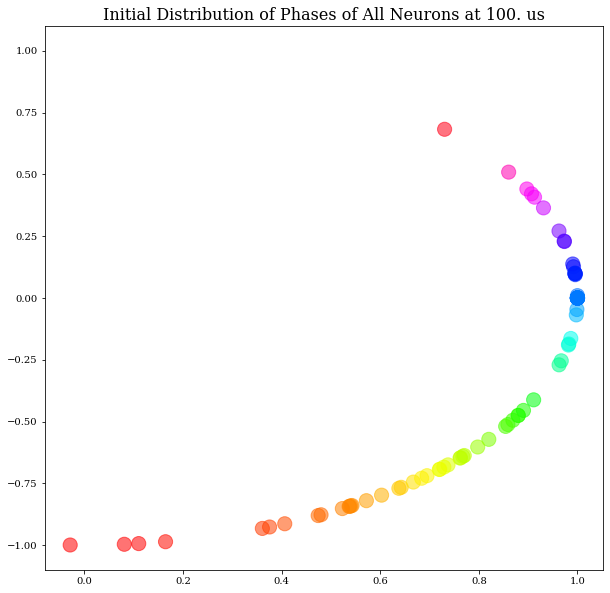

63


In [33]:
pot_arr = potential.v.copy()
pot_arr[pot_arr>1] = 1
phase = U_inv(pot_arr)
index2 = 1
sorted_phase = np.sort(phase[:,index3])

index3 = 1
print(np.sort(phase[:,index3]))
sin_phase = np.sin(2*pi*phase[:,index3])
cos_phase = np.cos(2*pi*phase[:,index3])
colors=sin_phase
figure(figsize=(10,10))
scatter(cos_phase,sin_phase,c=colors, s=200, cmap='hsv', alpha=0.55)

# xlim((-1.1,1.1))
ylim((-1.1,1.1))
plt.title('Initial Distribution of Phases of All Neurons at ' + str(potential.t[index3]), fontsize=16)
plt.savefig(results_dir +str(runnum)+ 'Initial Distribution of Phases.png')
show()
print(len(np.unique(sin_phase)))


In [16]:
def get_time_float(st):
#     print(st,type(st))
    st = format(st)
#     print(st,type(st))
    spl = st.split()
    if spl[1] == 'ms':
        return float(spl[0])
    elif spl[1] == 's':
        return float(spl[0])*1000
    else:
        print('Conversion failed!')
        return False

In [17]:
a = '0.395 s'
b = '10. ms'

print(get_time_float(a),type(get_time_float(a)))
print(get_time_float(b),type(get_time_float(b)))

395.0 <class 'float'>
10.0 <class 'float'>


In [18]:
msecond = 1e-3
second = 1

v_values = firing_time.values('t')
indice = []
firing_data = []
# print(v_values.keys())
for i in list(v_values.keys())[:]:
#     firing_data += [[get_time_float(x),i] for x in v_values[i]]
#     n_index = i
    for x in v_values[i]:
        y=get_time_float(x)
        indice=[y,i]
        firing_data.append(indice)

#print(firing_data)
firing_data_short=np.asarray(firing_data) 
#print(firing_data_short)


Conversion failed!
Conversion failed!
Conversion failed!
Conversion failed!
Conversion failed!


In [21]:
print(firing_data_short)
import json

with open(results_dir +'DC_only_firing_data_'+str(I)+'.json','w') as inf:
    json.dump(firing_data,inf)

[[ 0.   1. ]
 [ 0.8  1. ]
 [ 1.9  1. ]
 ...
 [ 0.4 79. ]
 [ 0.8 79. ]
 [ 1.2 79. ]]


In [22]:
firing_data_short=np.asarray(sorted(firing_data)) 
# firing_data_short=sorted(firing_data_short)
print(firing_data_short)

[[0.00000e+00 1.00000e+00]
 [0.00000e+00 4.00000e+00]
 [0.00000e+00 1.00000e+01]
 ...
 [2.49999e+04 4.40000e+01]
 [2.49999e+04 6.90000e+01]
 [2.49999e+04 7.10000e+01]]


In [41]:
low,up = 0,20
fir = np.asarray([x for x in firing_data_short if  x[0] > low and x[0] < up])
print(fir)

[[ 0.4 21. ]
 [ 0.4 26. ]
 [ 0.4 48. ]
 ...
 [19.9 44. ]
 [19.9 69. ]
 [19.9 71. ]]


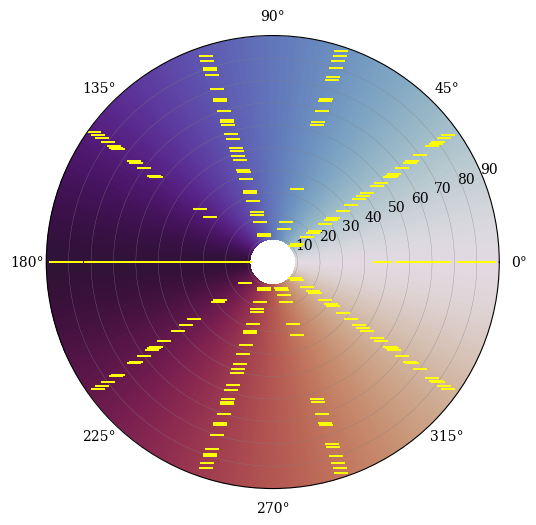

In [42]:
azimuths = np.arange(0, 361, 1)
zeniths = np.arange(9, 92, 1)
values = azimuths * np.ones((83, 361))
fig, ax = plt.subplots(dpi=100,subplot_kw=dict(projection='polar'), figsize=(6,6))
ax.pcolormesh(azimuths*np.pi/180.0, zeniths, values[:-1,:-1], cmap=plt.get_cmap('twilight'))
norm_phase = ((fir[:,0])*2*np.pi)
norm_indices = (fir[:,1])+10


theta = np.arange(0,2*np.pi,0.01)
for i in range(10,91,9):
    ax.plot(theta , i*np.ones_like(theta), ls='-', lw=0.2, color='gray')
    
    

ax.plot(norm_phase, norm_indices, color='#FFFF00', marker='|',mew=10, markersize=2, ls='')

ax.set_yticks(range(10,91,10))
ax.set_axis_on()
plt.savefig(results_dir +str(runnum)+ 'Initial Firing Phase Code.png')
plt.show()


In [307]:
print(firing_data_short)

[[0.0000e+00 0.0000e+00]
 [1.0000e+00 0.0000e+00]
 [2.0000e+00 0.0000e+00]
 ...
 [2.4997e+04 8.0000e+01]
 [2.4998e+04 8.0000e+01]
 [2.4999e+04 8.0000e+01]]


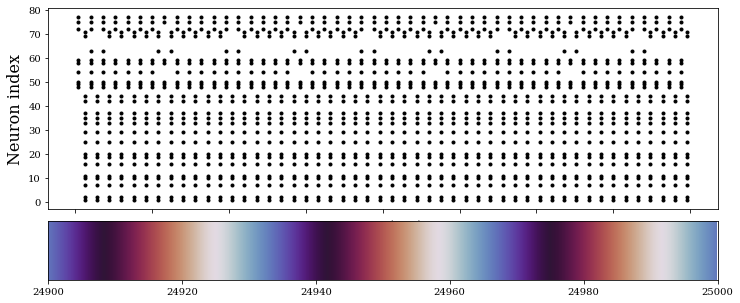

In [36]:
from matplotlib import cm
#import cmocean

# Plot linear raster plot with colour coding at the bottom
raster = plt.figure(figsize=(12,5))
gs = raster.add_gridspec(4,1)

#xlim = (491.7,525)
xlim = (24900, 25000)
#xlim2 = (0, 25)
#xlim = (991.7+4*33.3,1025+4*33.3)
#xlim = (2958.3,2991.6)

'''osc_plot = raster.add_subplot(gs[:1])
osc_plot.plot(osc[-1300:-99,0], osc[-1300:-99,1])
osc_plot.set_xlim(xlim[0],xlim[1])
osc_plot.set_xticklabels([])
osc_plot.set_yticklabels([])
'''

fire = raster.add_subplot(gs[:3])
fire.plot(fir[:,0], fir[:,1], '.k')
fire.set_yticks(np.arange(0,81,10))
xlabel('Time (ms)', fontsize=16)
ylabel('Neuron index', fontsize=16)
fire.set_xticklabels([])
t = np.arange(xlim[0],xlim[1], 0.01)
phase_ts = (30*pow(10,-3) * t - 0.75) % 1

phase = raster.add_subplot(gs[3:])
phase_color = np.array([list(phase_ts) for i in range(5)])
phase.pcolormesh(t, np.arange(5), phase_color[:-1,:-1], cmap=cm.get_cmap('twilight'))
k=phase_color[:-1,:-1]
phase.set_yticks([])
phase.set_xlim(xlim[0],xlim[1])
plt.savefig(results_dir +str(runnum)+ 'Rastor_Colored_Final.png')
plt.show()


In [326]:
fir

array([[ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  2.],
       ...,
       [19., 78.],
       [19., 79.],
       [19., 80.]])

In [167]:
result = '"testing","0.8841","642000.0","80.014521","-60.940653","4522126666","1500854400"\n"1500842014000","name","80.014521","-60.996532","sampledevice","3","name"'

for line in result.splitlines():
    dd = [x.strip('"') for x in line.split(',')]
    print(dd)

['testing', '0.8841', '642000.0', '80.014521', '-60.940653', '4522126666', '1500854400']
['1500842014000', 'name', '80.014521', '-60.996532', 'sampledevice', '3', 'name']
